In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
dataframe = pd.read_csv('airline_passengers.csv')

# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html
# dataframe.iloc[:, [False, True]].values

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(dataframe["Passengers"].values)

In [ ]:
# plt.plot(
#     [row[0] for row in dataframe.iloc[:, [False, True]].values],
#     color = 'blue',
#     label = 'no. of passengers')
# plt.plot(
#     np.log([row[0] for row in dataframe.iloc[:, [False, True]].values]),
#     color = 'blue',
#     label = 'no. of passengers')
plt.plot(
    pd.DataFrame(np.log([row[0] for row in dataframe.iloc[:, [False, True]].values])).diff(),
    color = 'blue',
    label = 'no. of passengers')
plt.show()

In [3]:
train = dataframe.iloc[:-12] # train.iloc[:, [False, True]].values
test = dataframe.iloc[-12:]

In [4]:
dfpdl = np.log(train["Passengers"]).diff()
dfpdl = dfpdl.fillna(np.average(dfpdl.iloc[1:].values))
train_processed = np.reshape(dfpdl.values, (-1, 1))

In [5]:
x_train = []
y_train = []

for i in range(10, 132):
    x_train.append(train_processed[i-10:i])
    y_train.append(train_processed[i])

x_train, y_train = np.array(x_train), np.array(y_train)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)

# X_test = []
# for i in range(60, 80):
#     X_test.append(inputs[i-60:i, 0])

# X_test = np.array(X_test)

In [7]:
il = np.log(dataframe["Passengers"][144 - 12 - 10:])
idl = il.diff()
idl = idl.fillna(np.average(idl.iloc[1:].values))
test_processed = np.reshape(idl.values, (-1, 1))

In [8]:
x_test = []
y_test = []

for i in range(10, 22):
    x_test.append(test_processed[i-10:i])
    y_test.append(test_processed[i])

x_test, y_test = np.array(x_test), np.array(y_test)

In [9]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [49]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

### Training

In [55]:
regressor.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=['mean_squared_error'])
hist = regressor.fit(x_train, y_train, epochs=500,
                     batch_size=32, validation_data=(x_test, y_test))

Epoch 1/500
4/4 [==============================] - 6s 338ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2/500
4/4 [==============================] - 0s 23ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 3/500
4/4 [==============================] - 0s 22ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/500
4/4 [==============================] - 0s 21ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/500
4/4 [==============================] - 0s 21ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/500
4/4 [==============================] - 0s 21ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/500
4/4 [======================

### End of Training

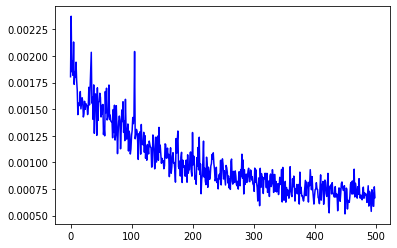

In [56]:
plt.plot(
    hist.history['loss'],
    color = 'blue',
    label = 'acc')
plt.show()

In [ ]:
# Passengers_Pred = regressor.predict(X_test).flatten()

# dataset["ShiftLogPassengers"] = dataset["LogPassengers"].shift(1)
# previous = dataset["ShiftLogPassengers"]
# dataset[test_idx, "1step_test"] = previous[test_idx] + Passengers_Pred

In [2]:
# s = pd.Series(np.random.random(10))
# t = np.log(s).diff()
# t.iat[0] = np.log(s.iat[0])
# res = np.exp(t.cumsum())

In [ ]:
predicted = regressor.predict(x_test)

In [58]:
t = predicted.flatten()
t[0] = il.iat[-12]
res = np.exp(t.cumsum())

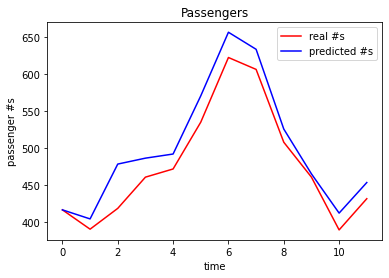

In [59]:
plt.plot(test["Passengers"].values, color = 'red', label = 'real #s')
plt.plot(res, color = 'blue', label = 'predicted #s')
plt.title('Passengers')
plt.xlabel('time')
plt.ylabel('passenger #s')
plt.legend()
plt.show()